# **Practice 8: Lyapunov Functions and Stability**
## **Goals for today**

---

During today practice we will:
* Recall stability of the Linear Systems
* Linearization of Nonlinear Systems
* Lyapunov Direct method

## **Stability of the Linear Systems**
A linear system in form:
\begin{equation}
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t)
\end{equation}

Is said to be **assymptotically** stable (internally) if following holds:
\begin{equation}
\Re(\lambda_i) < 0, \forall i 
\end{equation}



One can easialy proof the fact above by directly solving ODE above, which may be done fairly easy by applying spectral decomposition:
\begin{equation}
\mathbf{x}(t) = e^{\mathbf{A}t}\mathbf{x}(0)=\mathbf{Q}e^{\mathbf{\Lambda}t}\mathbf{Q}^{-1} \mathbf{x}(0) 
\end{equation}

Linear system is said to be stable in the sense of Lyapunov (marginally stable) if: 
\begin{equation}
\Re(\lambda_i) \leq 0, \forall i 
\end{equation}
Note that additionally algebraic and geometric multiplicity of the zero eigenvalues should coincide. 


### **Example:**

Recall the mass spring damper system with state space representattion given as:

\begin{equation}
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}
\end{equation}

Let us numerically find the eigen values of this matrix in order to analyze stability of the system:

In [1]:
from numpy.linalg import eig
from numpy import real

m = 1
b = 2
k = 5

A = [[0,1],
     [-k/m, -b/m]]

# One may find eigen system using following command 
lambdas, Q = eig(A) # lambdas - is the array of eigen values and Q is the matrix with eigen vector on its columns v = Q[:,i]
print(f'Eigen values:\n {lambdas}')
print(f'Real parts:\n {real(lambdas)}')


Eigen values:
 [-1.+2.j -1.-2.j]
Real parts:
 [-1. -1.]



We can obtain response by integrating the system 

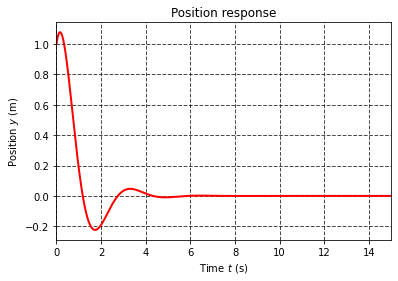

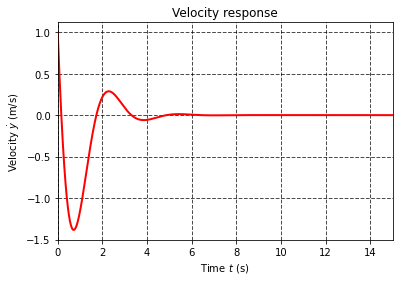

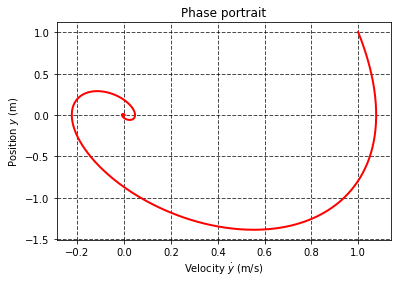

In [2]:
from numpy import dot, linspace
from scipy.integrate import odeint # import integrator routine

def mbk_ode(x, t, A):
    dx = dot(A,x)
    return dx


t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span

x0 = [1,1]
x_sol = odeint(mbk_ode, x0, t, args=(A,)) # integrate system "sys_ode" from initial state $x0$
y, dy = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

from matplotlib.pyplot import *

title(r'Position response')
plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

title(r'Velocity response')
plot(t, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(y, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Position ${y}$ (m)')
xlabel(r'Velocity $\dot{y}$ (m/s)')
show()

## **Linearized systems**

An approach above may be used to analyze the stability of the nonlinear systems in form:

\begin{equation}
\mathbf{\dot{x}} (t)=\boldsymbol{f}\big(\mathbf{x}(t)\big) 
\end{equation}

To do so once may find the liniarized representation of the nonlinear system nearby equalibrium of interest as follows:

\begin{equation}
\mathbf{\dot{\tilde{x}}} (t) = \frac{\partial \boldsymbol{f}}{\partial \mathbf{x}}\mid_{\mathbf{x}_e} \tilde{x} =\mathcal{J}(\mathbf{x}_e)\tilde{x}=\mathbf{A}\tilde{x}
\end{equation}
where $\tilde{x}=  \mathbf{x}_e - \mathbf{x}(t)$ is the deviation from the equalibrium point.

### **Example:**

Consider the following system:

\begin{equation}
\begin{cases}
\dot{x}_1 = x_1 - x_1^3 + 2 x_1 x_2\\
\dot{x}_2 = -x_2 + \frac{1}{2}x_1 x_2
\end{cases}
\end{equation}

Analyze the system stability in the following equalibrias:

\begin{equation}
x_{e_1} = 
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\quad
x_{e_2} = 
\begin{bmatrix}
1 \\ 
0
\end{bmatrix},
\end{equation}


Sometimes finding jacobians of the state space equations is envolving, and one may use a symbolic routines instead.



In [3]:
from sympy import Matrix, symbols
from sympy.utilities.lambdify import lambdify
from numpy.random import randn

# Define vector for states 
x = symbols('x1, x2') 

# Define state vector field: f(x)
f_symb = Matrix([x[0]- x[0]**3 + 2*x[0]*x[1],
                 -x[1] + x[0]*x[1]/2]) 

# Find analytical expression of jacobian
J_symb = Matrix([f_symb]).jacobian(x)
print(f'System Jacobian:\n{J_symb}')

System Jacobian:
Matrix([[-3*x1**2 + 2*x2 + 1, 2*x1], [x2/2, x1/2 - 1]])


Now we can create a numerical function from the obtained system Jacobian:

In [4]:
J_num = lambdify([x], J_symb)

x_e = 1.0, 0.0 
A = J_num(x_e)
lambdas, Q = eig(A) 
print(f'Eigen values:\n {lambdas}')

Eigen values:
 [-2.  -0.5]


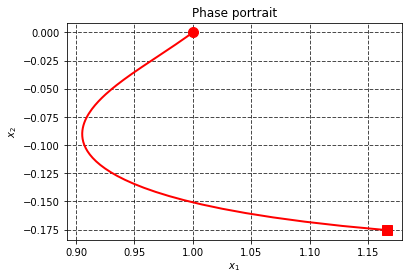

In [5]:
from scipy.integrate import odeint # import integrator routine

f_num = lambdify([x], f_symb)

def sys_ode(x, t):
    dx = f_num(x)[:,0]
    return dx

t0 = 0 # Initial time 
tf = 100 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span

x0 = x_e + 0.1*randn(2)
x_sol = odeint(sys_ode, x0, t) # integrate system "sys_ode" from initial state $x0$
x_1, x_2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states


title(r'Phase portrait')
plot(x_e[0], x_e[1], 'r', markersize=10, marker='o')
plot(x_1[0], x_2[0], 'r', markersize=10, marker="s")
plot(x_1, x_2, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'${x_1}$')
ylabel(r'${x_2}$')
show()

### **Exercise**: 
*    Repeat the analysis above for stability points of nonlinear pendulum whose dynamics given by:
\begin{equation}
\dot{\mathbf{x}} = 
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} 
\end{bmatrix} 
=
\begin{bmatrix}
\dot{\theta} \\
-\frac{1}{m l^2}(  mgl \sin \theta+b \dot{\theta})
\end{bmatrix} 
\end{equation}





## **Lyapunov Direct Method**
In the Lyapunov Direct Method, we are trying to prove stability of an equilibrium for a given dynamical system ${\dot{\mathbf{x}}=\boldsymbol{f}(\mathbf{x})}$ by looking for  **candidate Lyapunov function** $V(\mathbf{x}):\mathbb{R}^{n}\rightarrow \mathbb{R} $ that satisfies the following conditions:



>*   $V(\mathbf{x})=0$ if and only if $\mathbf{x}=\mathbf{0}$
>*   $V(\mathbf{x})>0$ if and only if $\mathbf{x}\neq\mathbf{0}$
>*   $\dot{V}(\mathbf{x}) \leq 0$ if and only if $\mathbf{x}\neq\mathbf{0}$ 

This is known as the criteria of **asymptotic stability** of the equilibrium of ${\dot{\mathbf{x}}=\boldsymbol{f}(\mathbf{x})}$
 
In two dimensions $\mathbf{x}\in\mathbb{R}^2$ one can interpret the stability criteria above geometrically by thinking of a projection of system dynamics vector $\boldsymbol{f}$ onto the gradient of $V$. 


### **Example:**

Consider the following system:
\begin{equation}
\begin{cases}
\dot{x}_1 = -x_1 + x_2  \\ 
\dot{x}_2 = -x_1 - x_2^3
\end{cases}
\end{equation}

with following Lyapunov candidate:
\begin{equation}
V(\mathbf{x}) = x_1^2 + x_2^2 
\end{equation}

One may use a chain rule in order to find $\dot{V}$ as follows:
\begin{equation}
\dot{V} =  \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\mathbf{\dot{x}}_i = \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\boldsymbol{f}_i = \nabla V \cdot \boldsymbol{f}
\end{equation}
<!-- 
Analyze the system stability in the following equalibrias:

\begin{equation}
x_{e_1} = 
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\quad
x_{e_2} = 
\begin{bmatrix}
1 \\ 
0
\end{bmatrix},
\end{equation} -->

Let's use symbolical tools in order to find the derevitive of Lyapunov function:

In [6]:
    from sympy import simplify
    x = symbols('x_1, x_2')
    V_symb = x[0]**2 + x[1]**2

    grad_V = Matrix([V_symb]).jacobian(x)
    print(f'Gradient of Lyapunov candidate:\n {grad_V}')
    
    f_symb = Matrix([-x[0] + x[1],
                     -x[0] - x[1]**3])
    
    dV = simplify(grad_V*f_symb) 
    print(f'Time derevitive of Lyapunov candidate:\n {dV}')
    

Gradient of Lyapunov candidate:
 Matrix([[2*x_1, 2*x_2]])
Time derevitive of Lyapunov candidate:
 Matrix([[-2*x_1**2 - 2*x_2**4]])


In [7]:
    from sympy import simplify
    x = symbols('x_1, x_2')
    V_symb = 4*x[0]**2 + 2*x[1]**2 + 4*x[0]**4 

    grad_V = Matrix([V_symb]).jacobian(x)
    print(f'Gradient of Lyapunov candidate:\n {grad_V}')
    
    f_symb = Matrix([x[1] - x[0],
                     -2*x[0] - 2*x[1] -  4*x[0]**3])
    
    dV = simplify(grad_V*f_symb) 
    print(f'Time derevitive of Lyapunov candidate:\n {dV}')
    

Gradient of Lyapunov candidate:
 Matrix([[16*x_1**3 + 8*x_1, 4*x_2]])
Time derevitive of Lyapunov candidate:
 Matrix([[-16*x_1**4 - 8*x_1**2 - 8*x_2**2]])


Clearly with choosen Lyapunov candidate the system is stable (in fact globally asymptotically stable)

Let us now visualyse response of the system:


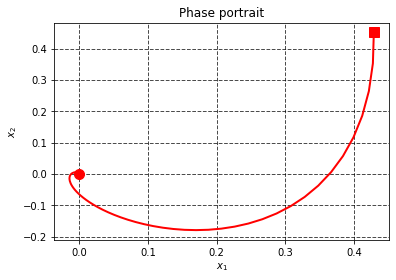

In [8]:
# Create a numerical function from symbolic one
f_num = lambdify([x], f_symb)

def sys_ode(x, t):
    dx = f_num(x)[:,0]
    return dx

t0 = 0 # Initial time 
tf = 100 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span

x_e = 0, 0 
x0 = randn(2)
x_sol = odeint(sys_ode, x0, t) # integrate system "sys_ode" from initial state $x0$
x_1, x_2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states


title(r'Phase portrait')
plot(x_e[0], x_e[1], 'r', markersize=10, marker='o')
plot(x_1[0], x_2[0], 'r', markersize=10, marker="s")
plot(x_1, x_2, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'${x_1}$')
ylabel(r'${x_2}$')
show()

Lets plot response of the system together with our choosen Lyapunov candidate:

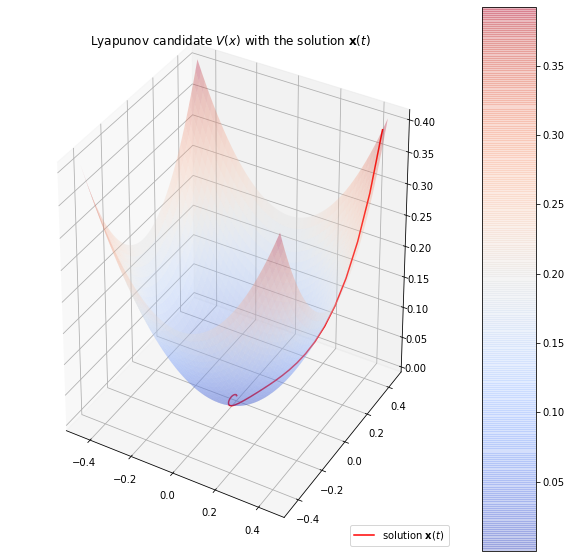

In [9]:
V_num = lambdify([x], V_symb)

N = 1000
x_max = max(abs(x_1[0]),abs(x_2[0]))

x1 = linspace(-x_max, x_max, N)
x2 = linspace(-x_max, x_max, N)
X_1, X_2 = np.meshgrid(x1, x2)


V_gen = X_1**2 + X_2**2
# V_gen = V_num([X_1, X_2])
# V with solution x(t)
V_sol = np.zeros((len(x_1),), dtype = float)
for i in range (len(x_1)):
  V_sol[i] = x_1[i]**2 + x_2[i]**2 

fig = figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_1, X_2, V_gen, cmap = cm.coolwarm, alpha = 0.3)
ax.plot(x_1, x_2, V_sol, 'r', label=r'solution $\mathbf{x}(t)$')
title(r'Lyapunov candidate $V(x)$ with the solution $\mathbf{x}(t)$')
fig.colorbar(surf, shrink=1, aspect=10)
ax.legend(loc = 'lower right')
show()

## **Linear Systems, Lyapunov Equations**
It may be shown that for linear system:

\begin{equation}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}
\end{equation}

if one would choose Lyapunov candidate as:

\begin{equation}
V(\mathbf{x}) = \mathbf{x}^T\mathbf{S}\mathbf{x}
\end{equation}

with derevitive given by:
\begin{equation}
    \dot V(\mathbf{x}) = (\mathbf{A}\mathbf{x})^T\mathbf{S}\mathbf{x} + 
    \mathbf{x}^T\mathbf{S}\mathbf{A}\mathbf{x} = 
    \mathbf{x}^T(\mathbf{A}^\top\mathbf{S} + \mathbf{S}\mathbf{A})\mathbf{x}
\end{equation}

thus system should be stable provided the solution of the following equation exist:

\begin{equation}
    \mathbf{A}^\top\mathbf{S} + \mathbf{S}\mathbf{A} = -\mathbf{Q}
\end{equation}

The matrix $\mathbf{S}$ and $\mathbf{Q}$ should be a **positive-definite matrices**. 


### **Positive definite matix**
In mathematics, a **symmetric matrix** $\mathbf{M}$ with real entries is positive-definite if the real number $z^T\mathbf{M}z$ is positive for every nonzero real column vector $z$.

A matrix $\mathbf{M}$ is positive-definite if and only if it satisfies any of the following equivalent conditions:

* $\mathbf{M}$ is congruent with a diagonal matrix with positive real entries.
* $\mathbf{M}$ is symmetric or Hermitian, and all its eigenvalues are real and positive .
* $\mathbf{M}$ is symmetric or Hermitian, and all its leading principal minors are positive.

### **Examples:**
Let's consider the following system:
$$\dot{\mathbf{x}} = 
\begin{bmatrix} -1 & 1 \\ -5 & -1
\end{bmatrix}
\mathbf{x}
$$

Assume that: $\mathbf{S} = \begin{bmatrix} s_1 & s_2 \\ s_3 & s_4
\end{bmatrix}$ and $\mathbf{Q} = \begin{bmatrix} 1 & 0 \\ 0 & 1
\end{bmatrix}$

Then we can substitude this values into the equation:
$\mathbf{A}^\top\mathbf{S} + \mathbf{S}\mathbf{A} = -\mathbf{Q}$. And we get:

$$
\begin{bmatrix} -1 & -5 \\ 1 & -1
\end{bmatrix}
\begin{bmatrix} s_1 & s_2 \\ s_3 & s_4
\end{bmatrix}
+
\begin{bmatrix} s_1 & s_2 \\ s_3 & s_4
\end{bmatrix}
\begin{bmatrix} -1 & 1 \\ -5 & -1
\end{bmatrix}
=
-\begin{bmatrix} 1 & 0 \\ 0 & 1
\end{bmatrix}
$$

After multiplying the matrices we get:

$$
\begin{bmatrix} -s_1-5s_3 & -s_2-5s_4 \\ s_1-s_3 & s_2-s_4
\end{bmatrix}+
\begin{bmatrix} -s_1-5s_2 & s_1-s_2 \\ -s_3-5s_4 & s_3-s_4
\end{bmatrix}
= \begin{bmatrix} -1 & 0 \\ 0 & -1
\end{bmatrix}
$$

Finally we should to solve following equation:

$$
\begin{bmatrix} -2s_1-5s_2-5s_3 & s_1 - 2s_2 - 5s_4 \\ s_1-2s_3-5s_4 & s_2 + s_3 - 2s_4
\end{bmatrix}
=
\begin{bmatrix} -1 & 0 \\ 0 & -1
\end{bmatrix}
$$

Which we can rewrite into the form:

$$
\begin{cases}
-2s_1-5s_2-5s_3 = -1\\
s_1 - 2s_2 - 5s_4 = 0\\
s_1-2s_3-5s_4 = 0\\
s_2 + s_3 - 2s_4 = -1
\end{cases}
$$

The solution for this system is: $s_1 = \frac{1}{3}$, $s_2 = -\frac{1}{6}$, $s_3 = -\frac{1}{6}$, $s_4 = \frac{4}{3}$

In [10]:
from scipy.linalg import solve_continuous_lyapunov as lyap
from numpy import eye
A = [[-1,1],
     [-5,-1]]

Q = -eye(2)

lambdas, _ = eig(A) 

S = lyap(A, Q)
lambdas, _ = eig(S)
print("S:",S)
print("Eigen values for S-matrix:",lambdas)

S: [[ 0.33333333 -0.16666667]
 [-0.16666667  1.33333333]]
Eigen values for S-matrix: [0.30628706 1.36037961]


**Mass-spring-damper system**

Consider again the mass spring damper:

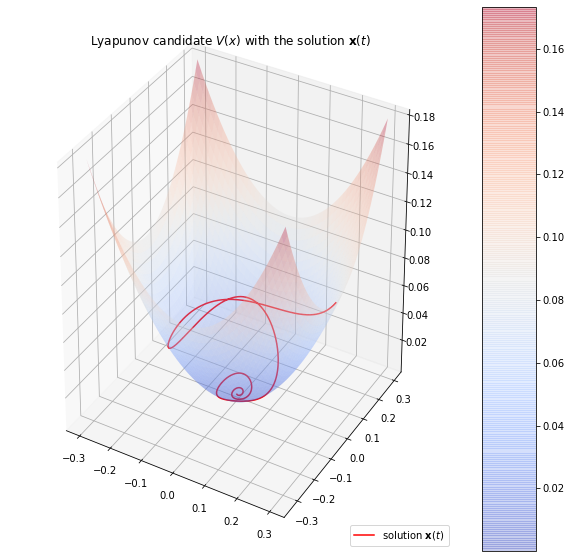

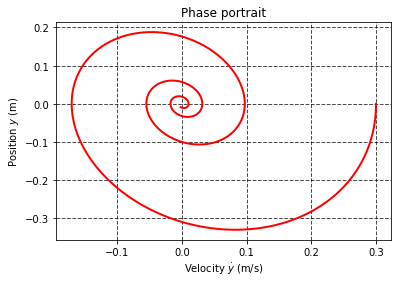

In [11]:
m = 1
b = 0.5
k = 2

A = [[0,1],
     [-k/m, -b/m]]
  
t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span

x0 = [0.3,0]
x_sol = odeint(mbk_ode, x0, t, args=(A,)) # integrate system "sys_ode" from initial state $x0$
x_1, x_2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

N = 1000
x_max = max(abs(x_1[0]),abs(x_2[0]))

x1 = linspace(-x_max, x_max, N)
x2 = linspace(-x_max, x_max, N)
X_1, X_2 = np.meshgrid(x1, x2)

X = [X_1, X_2]

# V_gen = 
V_gen = X_1**2 + X_2**2

V_sol = np.zeros((len(x_1),), dtype = float)
for i in range (len(x_1)):
  V_sol[i] = x_1[i]**2 + x_2[i]**2 

fig = figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_1, X_2, V_gen, cmap = cm.coolwarm, alpha = 0.3)
ax.plot(x_1, x_2, V_sol, 'r', label=r'solution $\mathbf{x}(t)$')
title(r'Lyapunov candidate $V(x)$ with the solution $\mathbf{x}(t)$')
fig.colorbar(surf, shrink=1, aspect=10)
ax.legend(loc = 'lower right')
show()

title(r'Phase portrait')
plot(x_1, x_2, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Position ${y}$ (m)')
xlabel(r'Velocity $\dot{y}$ (m/s)')
show()